<a href="https://colab.research.google.com/github/chadeowen/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [95]:
def Mean(list):
  return sum(list)/len(list)

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

Mean(sales)

3052.714285714286

In [97]:
def Variance(list):
  return sum((i - Mean(list)) ** 2 for i in list) / (len(list)-1)

Variance(sales)

214387.90476190473

In [98]:
def StandardDev(list):
  return Variance(list)**(1/2)

StandardDev(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [101]:
customers = [127, 80, 105, 92, 120, 115, 93]

import numpy as np

np.cov(sales,customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [102]:
StandardDev(customers)

17.057326313123664

In [103]:
def CorrCo(x,y):
  return np.cov(x,y) / (StandardDev(x)*StandardDev(y))
CorrCo(sales,customers) 

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [38]:
import pandas as pd

titanic = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
  
df = pd.read_csv(titanic)
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [39]:
df.isna().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [42]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [41]:
CorrCo(df['age'],df['has_cabin_number'])

array([[30.84259112,  0.2720951 ],
       [ 0.2720951 ,  0.03247225]])

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

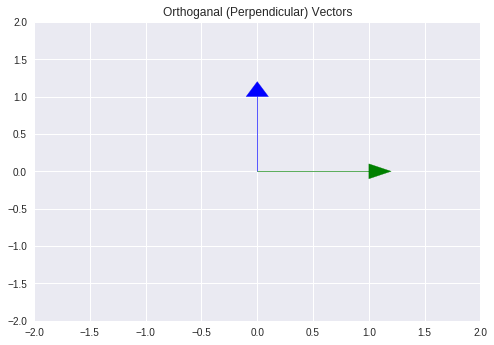

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

plt.arrow(0, 0, 1, 0, head_width=.2, head_length=0.2, color = 'green')
plt.arrow(0, 0, 0, 1,head_width=.2, head_length=0.2, color ='blue')

plt.xlim(-2,2)          
plt.ylim(-2,2)
plt.title("Orthoganal (Perpendicular) Vectors")
plt.show();

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [53]:
a = [-5,3,7]
b = [6,-8,2]
print(np.dot(a,b))
print('')
print('No, the dot product of orthogonal vectors is always zero')

-40

No, the dot product of orthogonal vectors is always zero


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [62]:
c = [2,-15,6,20]
print(np.linalg.norm(c)**2)
print(np.dot(c,c))
print(np.matmul(np.transpose(c),c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Norm(d) = Sqare Root of 7^2 + 12^2
= Square Root of 49 + 144
= Square Root of 193
= 13.892

--

Norm(e) = Square Root of 2^2 + 11^2 + -8^2
= Square Root of 4 + 121 + 64
= Square Root of 189 = 13.748

--

Putting each Vector Coordinate over it's Norm makes it a Unit Vector

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [68]:
def Norm(list):
  return (sum(i ** 2 for i in list)**(1/2))

f = [4,12,11,9,2]

Norm(f)

19.131126469708992

In [73]:
print([(4/19.131126469708992),(12/19.131126469708992),(11/19.131126469708992),
      (9/19.131126469708992),(2/19.131126469708992)])

[0.20908334939572668, 0.62725004818718, 0.5749792108382483, 0.470437536140385, 0.10454167469786334]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

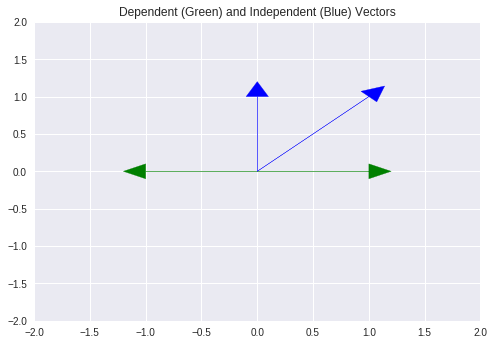

In [65]:
plt.arrow(0, 0, 1, 0, head_width=.2, head_length=0.2, color = 'green')
plt.arrow(0, 0, 0, 1,head_width=.2, head_length=0.2, color ='blue')
plt.arrow(0, 0, -1, 0, head_width=.2, head_length=0.2, color = 'green')
plt.arrow(0, 0, 1, 1,head_width=.2, head_length=0.2, color ='blue')

plt.xlim(-2,2)          
plt.ylim(-2,2)
plt.title("Dependent (Green) and Independent (Blue) Vectors")
plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

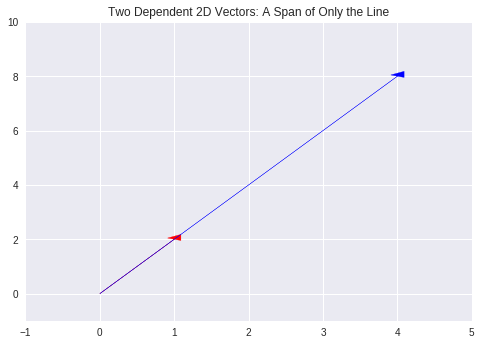

In [87]:
plt.arrow(0, 0, 1, 2, head_width=.2, head_length=0.2, color = 'red')
plt.arrow(0, 0, 4, 8,head_width=.2, head_length=0.2, color ='blue')

plt.xlim(-1,5)          
plt.ylim(-1,10)
plt.title("Two Dependent 2D Vectors: A Span of Only the Line")
plt.show();

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

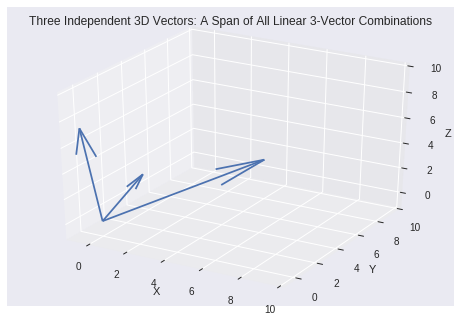

In [88]:
from mpl_toolkits.mplot3d import Axes3D

l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
ax.set_zlim([-1, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Three Independent 3D Vectors: A Span of All Linear 3-Vector Combinations")
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



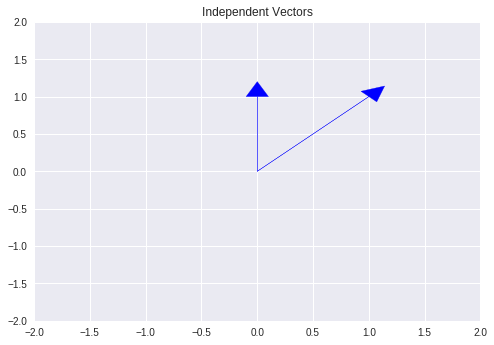

In [89]:

plt.arrow(0, 0, 0, 1,head_width=.2, head_length=0.2, color ='blue')

plt.arrow(0, 0, 1, 1,head_width=.2, head_length=0.2, color ='blue')

plt.xlim(-2,2)          
plt.ylim(-2,2)
plt.title("Independent Vectors")
plt.show();

## 6.2 What does it mean to form a basis?

To be linearly independent and to span the vector space  𝑉

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [104]:
print('R^3')

R^3


## 7.2 What does the rank of a matrix tell us?

Rank helps us determine the span

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

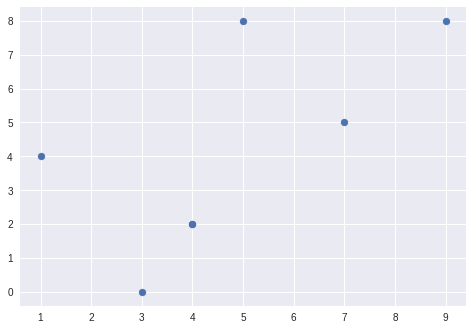

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()